In [102]:
#LGD stands for Loss given default
# so it means when a customer at a bank defaults on his loan
# how muhc money does the bak lose. The customer might have paid
#some amount back or no amount at all. 
# the bank wants to know if the amount the bank loses can be predicted
# for new customers who apply for a loan
# from the past data of all defaulters and their pending amounts

# importing required libraries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

import scipy, scipy.stats
import math # log function is inside this library
from collections import Counter

In [104]:
df=pd.read_csv("C:\\Users\\robotics\\Downloads\\LGD_DATA.csv")


In [105]:
df.describe()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands
count,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000
mean,149961.789339,42.328254,23.732897,2.495880,389.859718
std,28947.841061,18.280511,17.850707,0.953776,253.729433
min,100002.000000,16.000000,0.000000,1.000000,12.534521
25%,124900.500000,24.000000,6.000000,2.000000,226.434217
50%,149897.500000,42.000000,23.000000,2.000000,354.937874
75%,175019.500000,61.000000,42.000000,3.000000,488.676927
max,200454.000000,70.000000,53.000000,4.000000,3500.000000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ac_No                15290 non-null  int64  
 1   Age                  15290 non-null  int64  
 2   Years of Experience  15290 non-null  int64  
 3   Number of Vehicles   15290 non-null  int64  
 4   Gender               15290 non-null  object 
 5   Married              15290 non-null  object 
 6   Losses in Thousands  15290 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 836.3+ KB


In [107]:
df.tail()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
15285,189499,61,43,4,F,Single,58.426429
15286,142111,69,48,4,F,Married,304.519134
15287,176444,69,51,4,F,Married,282.149148
15288,180420,22,4,4,M,Married,822.470554
15289,157201,20,2,4,F,Married,406.924740


# visualizations

C:\Users\robotics\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Losses in Thousands'>

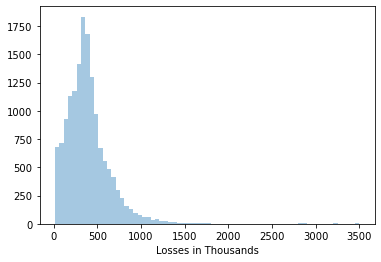

In [108]:
sns.distplot(df['Losses in Thousands'],kde=False,bins=70)

<AxesSubplot:xlabel='Age'>

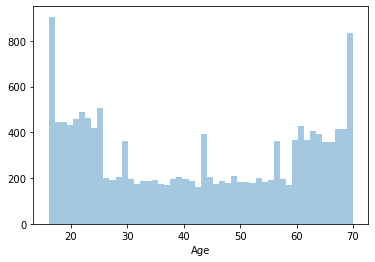

In [109]:
sns.distplot(df['Age'],kde=False,bins=50)

<AxesSubplot:xlabel='Years of Experience', ylabel='Density'>

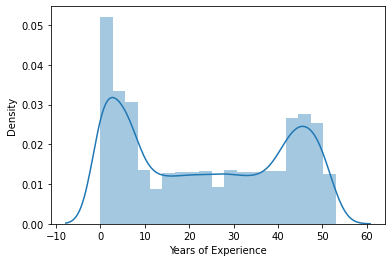

In [110]:
sns.distplot(df['Years of Experience'])

<AxesSubplot:xlabel='Married', ylabel='Losses in Thousands'>

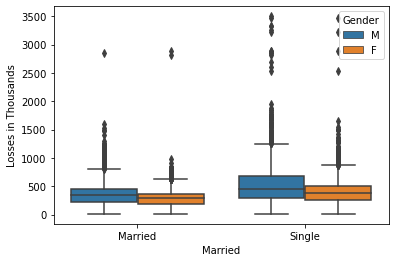

In [111]:
sns.boxplot()
sns.boxplot(x="Married",y="Losses in Thousands",data=df,hue="Gender")

In [112]:
df.corr()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands
Ac_No,1.000000,0.008291,0.008437,-0.003056,-0.000794
Age,0.008291,1.000000,0.997161,0.008366,-0.442962
Years of Experience,0.008437,0.997161,1.000000,0.008545,-0.442115
Number of Vehicles,-0.003056,0.008366,0.008545,1.000000,-0.011553
Losses in Thousands,-0.000794,-0.442962,-0.442115,-0.011553,1.000000


In [113]:
dummy_var=pd.get_dummies(df['Gender'],drop_first=True)
print( (dummy_var.head()))

   M
0  1
1  0
2  1
3  0
4  1


In [114]:

dummy_var1=pd.get_dummies(df['Gender'],drop_first=True)

dummy_var2=pd.get_dummies(df['Married'],drop_first=True)
dummy_var2.head()

df_new=pd.concat([df,dummy_var1,dummy_var2],axis=1)


In [115]:
df_new.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,M,Single
0,150024,24,5,1,M,Married,203.319595,1,0
1,144880,31,10,1,F,Single,402.197302,0,1
2,133742,56,37,1,M,Married,553.132096,1,0
3,151282,52,31,1,F,Married,292.430579,0,0
4,174407,20,3,1,M,Single,246.540576,1,1


In [116]:
df_new2=df_new.drop(['Gender','Married'],axis=1)
df_new2.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,M,Single
0,150024,24,5,1,203.319595,1,0
1,144880,31,10,1,402.197302,0,1
2,133742,56,37,1,553.132096,1,0
3,151282,52,31,1,292.430579,0,0
4,174407,20,3,1,246.540576,1,1


# spliting data into train and test

In [127]:
x=df_new2[["Age","Number of Vehicles","M","Single"]]
y=df_new2["Losses in Thousands"]
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)



# Modelling

In [117]:
from sklearn.linear_model import LinearRegression 
lm=LinearRegression()
lm.fit(x_train,y_train)


print(lm.intercept_)
print(lm.coef_)

from sklearn import metrics

pred=lm.predict(x_test)

from sklearn.metrics import r2_score
print (r2_score(y_test, pred))
print (metrics.mean_absolute_error(y_test,pred))

539.6565230110676
[ -6.14900704  -1.79059246  97.23493268 136.7922503 ]
0.29505257544943864
148.50819212153982


In [118]:
import statsmodels.regression.linear_model as sm
from statsmodels.tools import add_constant
X2 = add_constant(x_train)
lm= sm.OLS(y_train,X2)
lm2=lm.fit()
lm2.pvalues

const                  0.000000e+00
Age                    0.000000e+00
Number of Vehicles     4.052234e-01
M                     1.470589e-121
Single                6.953054e-233
dtype: float64

In [119]:
print(lm2.summary())

                             OLS Regression Results                            
Dep. Variable:     Losses in Thousands   R-squared:                       0.305
Model:                             OLS   Adj. R-squared:                  0.304
Method:                  Least Squares   F-statistic:                     1171.
Date:                 Fri, 16 Apr 2021   Prob (F-statistic):               0.00
Time:                         17:02:31   Log-Likelihood:                -72503.
No. Observations:                10703   AIC:                         1.450e+05
Df Residuals:                    10698   BIC:                         1.451e+05
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                539.6

In [120]:
import math
print (df_new2.head())
df_new2["AgeCategory"]=["Young" if df_new2['Age'][i]<=28 else "MiddleAged" if 28<df_new2['Age'][i]<58 else "Old" for i in range(len(df_new2))]
df_new2['Logy']=list(filter(math.log,df_new2['Losses in Thousands']))
Counter(df_new2['AgeCategory'])

# to convert the AgeCategory to dummy varables
dummy_var3=pd.get_dummies(df_new2['AgeCategory'],drop_first=True)
df_new3=pd.concat([df_new2,dummy_var3],axis=1)
df_new3.head()

    Ac_No  Age  Years of Experience  Number of Vehicles  Losses in Thousands  \
0  150024   24                    5                   1           203.319595   
1  144880   31                   10                   1           402.197302   
2  133742   56                   37                   1           553.132096   
3  151282   52                   31                   1           292.430579   
4  174407   20                    3                   1           246.540576   

   M  Single  
0  1       0  
1  0       1  
2  1       0  
3  0       0  
4  1       1  


,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,M,Single,AgeCategory,Logy,Old,Young
0,150024,24,5,1,203.319595,1,0,Young,203.319595,0,1
1,144880,31,10,1,402.197302,0,1,MiddleAged,402.197302,0,0
2,133742,56,37,1,553.132096,1,0,MiddleAged,553.132096,0,0
3,151282,52,31,1,292.430579,0,0,MiddleAged,292.430579,0,0
4,174407,20,3,1,246.540576,1,1,Young,246.540576,0,1


In [121]:
x=df_new3[["Age","Number of Vehicles","M","Single","Old","Young"]]
y=df_new3["Logy"]

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [123]:
from sklearn.linear_model import LinearRegression 
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [124]:
#see the error parameters
from sklearn import metrics

#make prediction
pred=lm.predict(x_test)
metrics.mean_absolute_error(y_test,pred)
from sklearn.metrics import r2_score
print (r2_score(y_test, pred))

# the r2 has improved
print (metrics.mean_absolute_error(y_test,pred))

0.31534598323198115
144.08099804253615


In [125]:
print(lm.intercept_) # see the intercept
print(lm.coef_)# see the betas

# now the equation will be
#"Age","Number of Vehicles","M","Single","Old","Young"
#log(losses in Thousands)= 5.91-0.005*(Age)+0.005*(#ofVehicles)+
#0.21*(Male)+0.31*(Single)-0.70*(Old)+0.02*(Young)

389.9539168135901
[  -2.02248475   -1.02058428   96.46811077  136.57000324 -144.87719205
   54.18510989]
